Creating amr_grid with octree refinement.
Size of base cell: 10 AU
Number of base cells along one side of the grid: 2
Distances to refinement limits: [5, 2.5, 1.25, 0.625] AU
Number refinements: 4
Length of total side of whole grid: 20.00 AU

Child cell size 1: 5.0 AU
Child cell size 2: 2.5 AU
Child cell size 3: 1.25 AU
Child cell size 4: 0.625 AU

Writing amr_grid.inp
Finished amr_grid.inp

Writing grid_distances.csv and grid_cellsizes.csv (not necessary for Radmc3d, but useful for pre/portprocessing of your model files. They have the same order as dust_densities.inp)
Finished grid_distances.csv
Finished grid_cellsizes.csv

Writing grid_info.txt
Finished grid_info.txt

Done


/home/joachim/exwings/exwings-codes/plot_r3d_functions.py:109: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


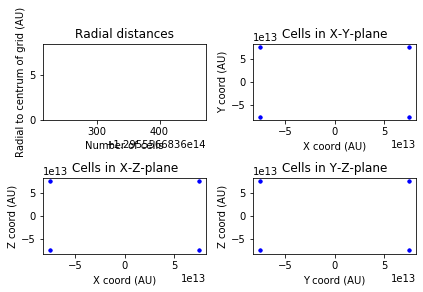

In [1]:
import create_r3d_functions as c3d
import plot_r3d_functions as p3d
#c3d.create_grid(100,9,[100.0/2, 100.0/4, 100.0/8, 100.0/16])

c3d.create_grid(10,2,[10,10/2,10/4,10/8])
p3d.plot_grid(nbins=10)
#c3d.create_duststar()





In [ ]:
basecubesize
smallcubesize[0,1,2,3]